## [Python Programming for Biologists, Tel-Aviv University / 0411-3122 / Spring 2015](http://py4life.github.io/TAU2015/)
# Homework 7

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.2)
sns.set_palette(sns.color_palette('Set1', 9))

## 1) Ebola outbeak

In this question we will analyze data from the 2014 Ebola global outbreak.

**a)** Start by reading the data in the CSV file from <https://raw.githubusercontent.com/Py4Life/ebola/master/country_timeseries.csv>. The file contains a time series of case counts and deaths from the [World Health Organization](http://www.who.int/csr/don/en/) and [WHO situation reports](http://www.who.int/csr/disease/ebola/situation-reports/en/). The data was originally compiled by [Caitlin Rivers](https://github.com/cmrivers/ebola).

Remember that _pandas_ can read files from a remote location so you don't have to copy it to your computer, unless you want to work offline.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Py4Life/ebola/master/country_timeseries.csv')
df.head(10)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776,NaN,10030,NaN,NaN,NaN,NaN,NaN,1786,NaN,2977,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775,NaN,9780,NaN,NaN,NaN,NaN,NaN,1781,NaN,2943,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769,8166,9722,NaN,NaN,NaN,NaN,NaN,1767,3496,2915,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730,8115,9633,NaN,NaN,NaN,NaN,NaN,1739,3471,2827,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706,8018,9446,NaN,NaN,NaN,NaN,NaN,1708,3423,2758,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695,NaN,9409,NaN,NaN,NaN,NaN,NaN,1697,NaN,2732,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630,7977,9203,NaN,NaN,NaN,NaN,NaN,NaN,3413,2655,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597,NaN,9004,NaN,NaN,NaN,NaN,NaN,1607,NaN,2582,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571,7862,8939,NaN,NaN,NaN,NaN,NaN,1586,3384,2556,NaN,NaN,NaN,NaN,NaN


As you can see, the data contains the accumulated number of cases and deaths in several countries. The `Date` column specifies the date of the data point. The `Day` column is days since 22 March 2014. The rest of the columns contain the accumulated number of cases and deaths. Cells that have no data - there was no update for that country on that date - contain `NaN`.

For example, `Cases_Guinea` is the accumulated number of cases of Ebola in Guinea (103 by 37 March 2014, 2730 by 31 December 2014, no additional cases reported until 3 January 2015); `Deaths_SierraLeone` is the accumulated number of deaths by Ebola in Sierra Leone (5 by 27 March 2014, 2827 by 31 December 2014).

**b)** Next, plot the number of cases in Liberia, Guinea and Sierra Leone over the entire time of the outbreak. You can use for x-axis the number of days since the start of the outbreak, but bonus points for using the date. (Note: you can invert the axis by calling `plt.gca().invert_xaxis()`).

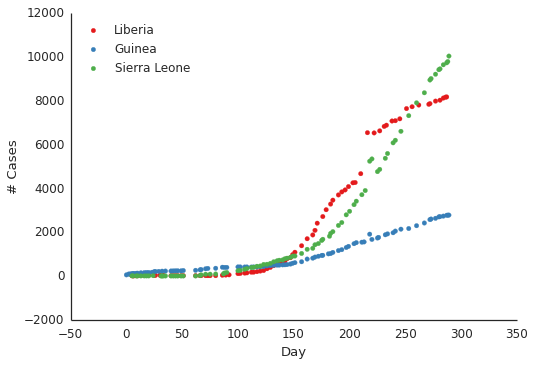

In [11]:
colors = sns.color_palette()
plt.scatter(df.Day, df.Cases_Liberia, color=colors[0], label='Liberia')
plt.scatter(df.Day, df.Cases_Guinea, color=colors[1], label='Guinea')
plt.scatter(df.Day, df.Cases_SierraLeone, color=colors[2], label='Sierra Leone')
plt.legend(loc='upper left')
plt.xlabel('Day')
plt.ylabel('# Cases')
sns.despine()

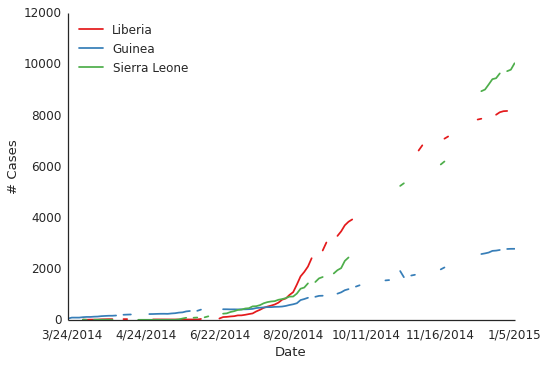

In [8]:
ax = df.plot('Date', 'Cases_Liberia')
df.plot('Date', 'Cases_Guinea', ax=ax)
df.plot('Date', 'Cases_SierraLeone', ax=ax)
ax.set_ylabel('# Cases')
ax.invert_xaxis()
ax.legend(['Liberia',"Guinea","Sierra Leone"], loc="upper left")
ax.grid(False)
sns.despine()

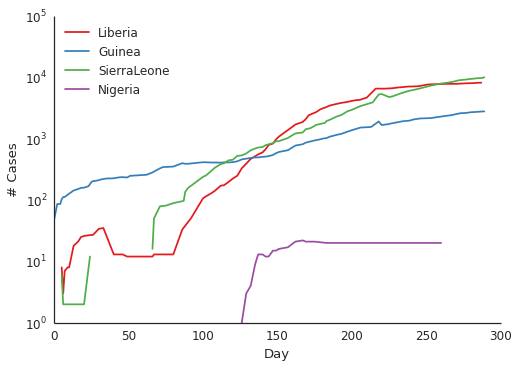

In [16]:
for col in ('Cases_Liberia', 'Cases_Guinea', 'Cases_SierraLeone', 'Cases_Nigeria'):
    idx = np.isfinite(df[col])
    plt.plot(df.Day[idx], df[col][idx], label=col[6:])
plt.legend(loc='upper left')
plt.xlabel('Day')
plt.ylabel('# Cases')
plt.yscale('log')
sns.despine()

Because our data is full of holes and noise we want to fit a smooth function to the data. We will use the simplest smoothing function - a polynomial. 

> _Reminder_: a polynomial of the argument $t$ with a degree $n$ is a function of t that has this structure: $f(t) = a_0 + a_1 t + a_2 t^2 + ... + a_n t^n$. The $a_i$ are called the _coefficients of the polynomial_. A well known result in Calculus is that [any continuous function can be approximated with a finite number of polynomials](http://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem).

To fit a polynomial of degree $n$ to the data one can use the method we learned in class (_curve_fit_). Another way to fit polynomials is the function [`numpy.polyfit`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). This function's input is the x and y values and the degree of the polynomial. Its output is the coefficients ($a_0, a_1, ..., a_n$). From these coefficients we can then create a polynomial function (in the Python sense of function) that we can use like any other function. This is done by callin `np.poly1d` on the coefficients tuple.

**c)** Fit a polynomial to the data in cases in Liberia. Use either `curev_fit` or `plotfit` or any other solution you find. 

Plot the data (using markers) and the polynomial fit (using a line). Note how the fit changes when you change the degree of the polynomial. The x-axis should be `Day`.

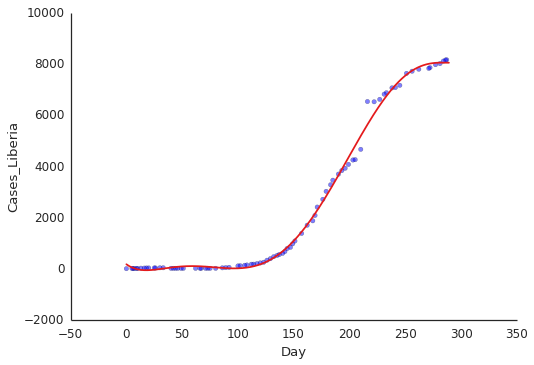

In [21]:
def fit_poly(df, col, deg=3):    
    t = df.Day[np.isfinite(df[col])]
    y = df[col][np.isfinite(df[col])]
    
    if 0 not in t:
        t[len(t)] = 0
        y[len(y)] = 0
    
    coefs = np.polyfit(t, y, deg=deg)
    p = np.poly1d(coefs)

    plt.scatter(t, y, alpha=0.5)
    t = np.linspace(0, df.Day.max(), 1000)
    plt.plot(t, p(t), label=col[6:])
    plt.xlabel('Day')
    plt.ylabel(col)
    sns.despine()
fit_poly(df, 'Cases_Liberia', 6)

**d)** Plot the data points and polynomial fit for cases in Liberia, Guinea, Sierra Leone and Nigeria, all on the same figure. Make sure the polynomial lines have different colors and add a legend (the data points can all be in the same color).

(10, 10000)

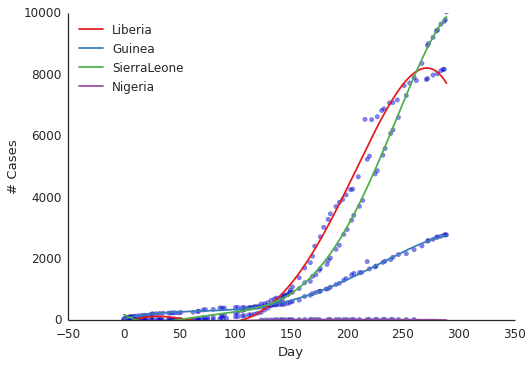

In [22]:
for col in ('Cases_Liberia', 'Cases_Guinea', 'Cases_SierraLeone', 'Cases_Nigeria'):
    fit_poly(df, col, 5)
plt.legend(loc='upper left')
plt.xlabel('Day')
plt.ylabel('# Cases')
sns.despine()
plt.ylim(10,10000)

## 2) Wright-Fisher model

The Wright-Fisher model (WF) is the standard model in population genetics. It is used to model the change in allele frequencies over time due to the action of natural selection, random genetic drift, mutation and recombination.

In this question we will use the WF to simulate the frequency of an allele in a single locus (one gene), bi-alleleic (two alleles) model. 

### Only drift (no selection, mutation or recombination)

In the first simulation we will do, we will consider only the effect of [random genetic drift]() on the change in frequency of one allele (let's call it $A$). 

The change in the frequency from one generation to the next is described by this prcess: imagine a pot with $N$ balls. A fraction $p$ of the balls is red. We get a new pot. We draw a ball from the old pot, put a ball of the same color in the new pot, and return the drawn ball to the old pot. We do this until the new pot has $N$ balls, then we throw away the old pot, get a new pot, and start again. This game can go on until, by chance, there are no more red balls or all the balls are red.

This process can be written using this equation:

$$
n \sim Bin(N,p) \\
p' = \frac{n}{N}
$$

where $N$ is the population size (total number of alleles), $p$ and $p'$ are the current frequency of $A$ and its frequency in the next generation. $Bin(N,p)$ is the binomial distribution with $N$ trials and probability of success $p$ -- therefore $n$ is a random variable (random number) drawn from that binomial distribution. 

**a)** Write a function called `simulation(N, p0)`. 
The function will simulate the WF process until allele $A$ is extinct (frequency is 0) or until it fixates (frequency is 1). 

Input: `N` is the population size, `p0` is the initial frequency of allele $A$. 

Output: `p` is an `array` or a `list` of the frequencies of $A$ in every generation. 

The function will also plot a figure of the frequency of $A$ as a function of the number of generations.

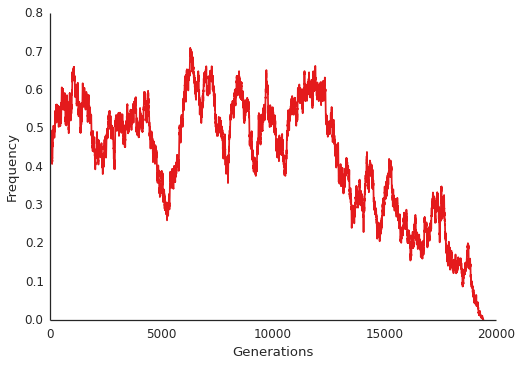

In [26]:
def simulation(N, p0):
    p = [p0]
    while 1 > p[-1] > 0:
        p.append(np.random.binomial(N,p[-1]) / N)

    plt.plot(p)
    plt.xlabel('Generations')
    plt.ylabel('Frequency')
    sns.despine()
    return p

N = 1e4
p0 = 0.5
simulation(N, p0);

**b)** Next we want estimate the _fixation probability_ of allele $A$. We can do it by running a large number of simulations (how many?) and check at the end of each simulation if the allele is fixed or extinct. The number of fixations divided by the total number of simulations is a good estimate of the _fixation probability_. 

Run the simulation as many times as you think is neccessary. Calculate and print the estimated _fixation probability_.

Fixation probability: 0.59


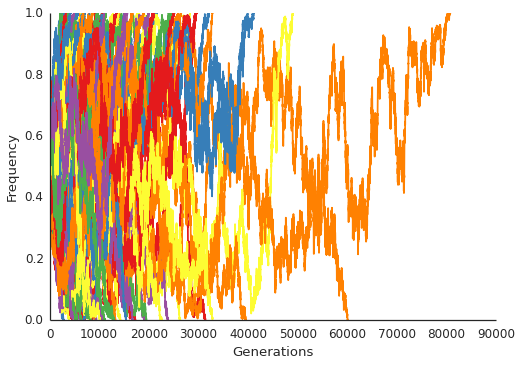

In [27]:
N = 1e4
p0 = 0.5
fixations = 0
simulations = 100

for _ in range(simulations):    
    p = simulation(N,p0)
    fixations += (p[-1]==1)    
    
print("Fixation probability:", fixations/simulations)

### Bonus: Drift & selection (no mutation or recombination)

If selection also affects the process, then the chance to draw a red ball (allele $A$) is a bit higher than the other balls. This is usually modeled by saying that the chance to draw a non-red ball is $1-s$ relative to the chance to draw a red ball. The equation is then:

$$
\hat{p} = \frac{p}{1-s+sp} \\
n \sim Bin(N, \hat{p}) \\
p' = \frac{n}{N}
$$

**c)** Rewrite the simulation function to include selection (add argument, change according to equation) and run the simulations loop again to estimate the fixation probability. Note that the initial probability can be rather low and still lead to many fixations - theory shows that in a large population ($N>10000$) and weak selection ($s<0.01$) the _fixation probability_ is roughly $2s$.

**Note**: This is a bonus question. You can get the full grade without doing it.

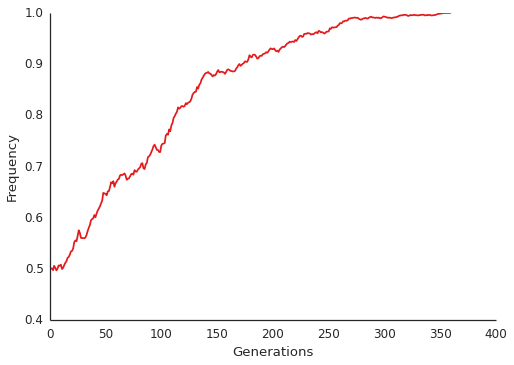

In [30]:
def simulation(N, p0, s):
    p = [p0]
    while 1 > p[-1] > 0:
        p.append(np.random.binomial(N, p[-1]/(1 - s + s * p[-1])) / N)

    plt.plot(p)
    plt.xlabel('Generations')
    plt.ylabel('Frequency')
    sns.despine()
    return p

N = 1e4
p0 = 0.5
s = 0.01
simulation(N, p0, s);

Fixation probability: 0.82


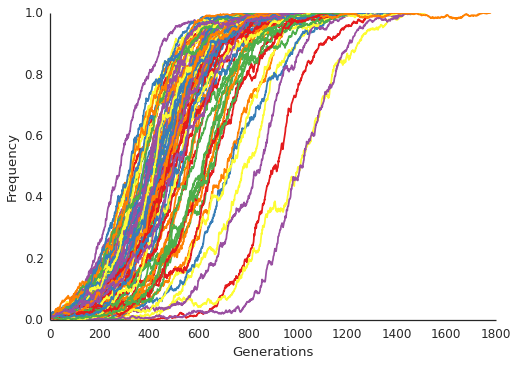

In [32]:
N = 1e4
p0 = 0.01
s = 0.01
fixations = 0
simulations = 100

for _ in range(simulations):    
    p = simulation(N, p0, s)
    fixations += (p[-1]==1)    
    
print("Fixation probability:", fixations/simulations)